<a href="https://colab.research.google.com/github/mohitdudhoria/House-Price-Prediction/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()S

Saving Housing.csv to Housing.csv


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df_main = pd.read_csv('Housing.csv')

# Display DataFrame Info
print("DataFrame Info:")
print(df_main.info())

# Display DataFrame Shape
print("\nDataFrame Shape:")
print(df_main.shape)

# Display DataFrame Description
print("\nDataFrame Description:")
print(df_main.describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

DataFrame Shape:
(545, 13)

DataFrame Description:
              price          area    bedrooms   bathrooms     stories  \
count  5

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Housing.csv')

# Find null values
null_values = df.isnull().sum()

# Print the count of null values for each column
print("Null values in each column:")
print(null_values)


Null values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


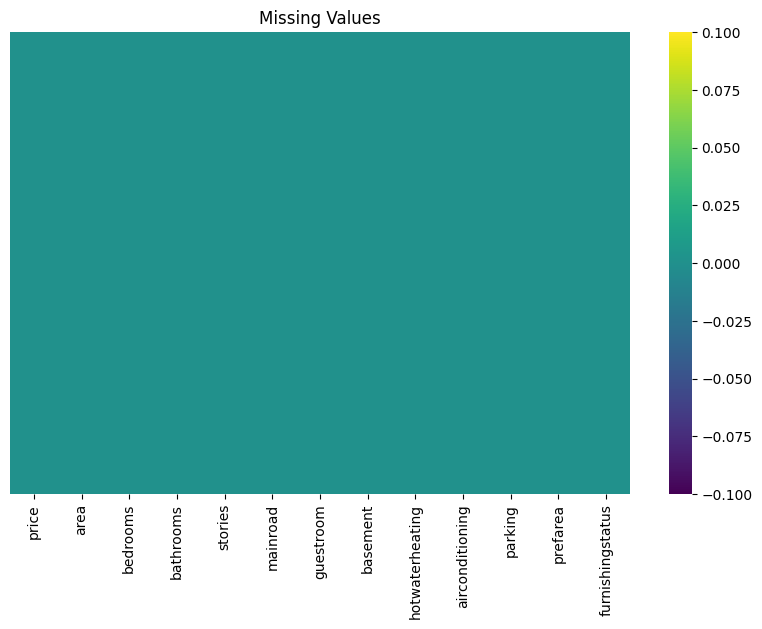

In [ ]:
# Count missing values
missing_values = df_main.isnull().sum()
print(missing_values)

# Visualize missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_main.isnull(), yticklabels=False, cmap='viridis')
plt.title('Missing Values')
plt.show()

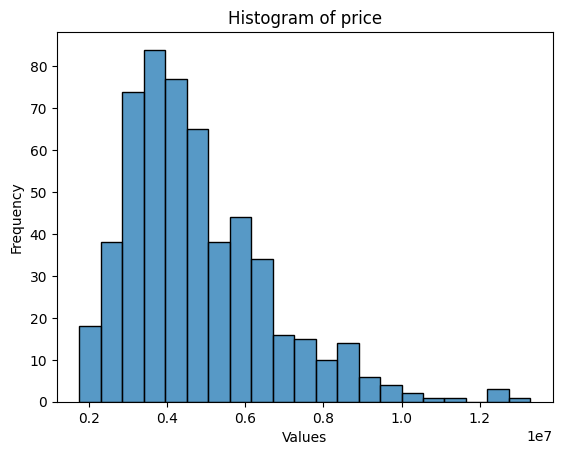

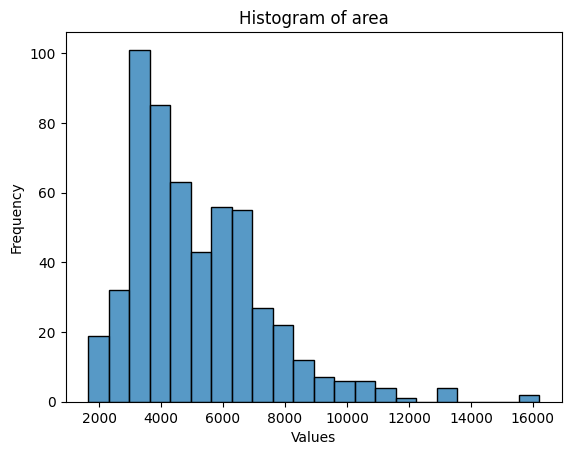

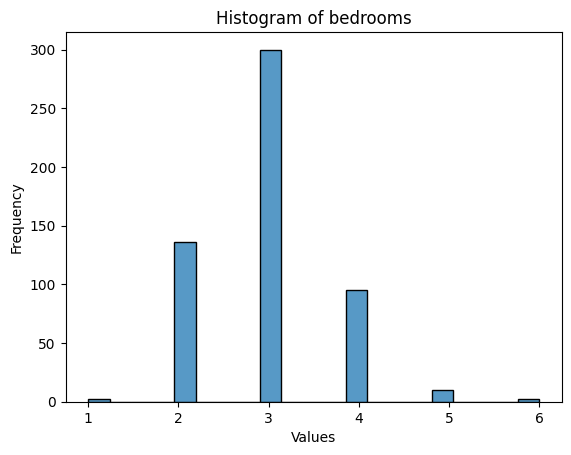

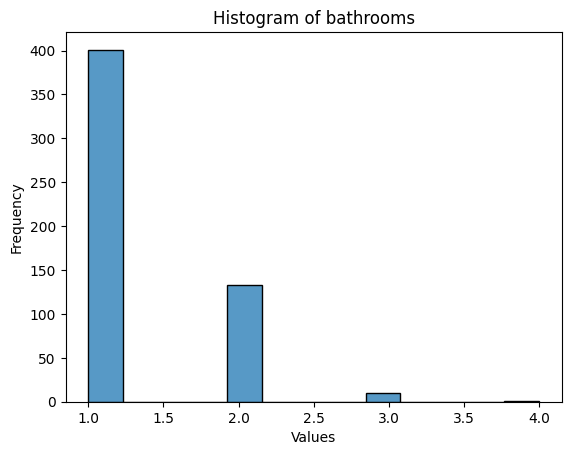

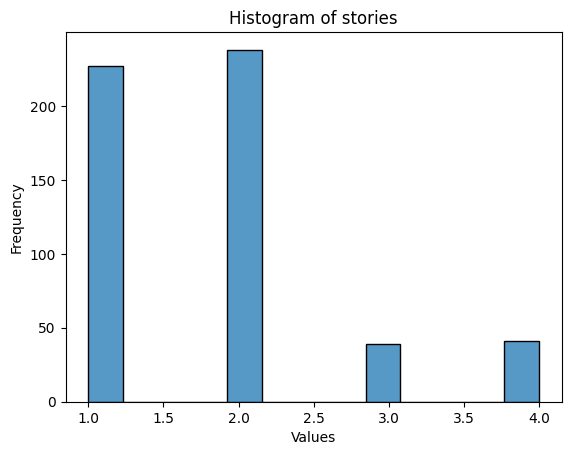

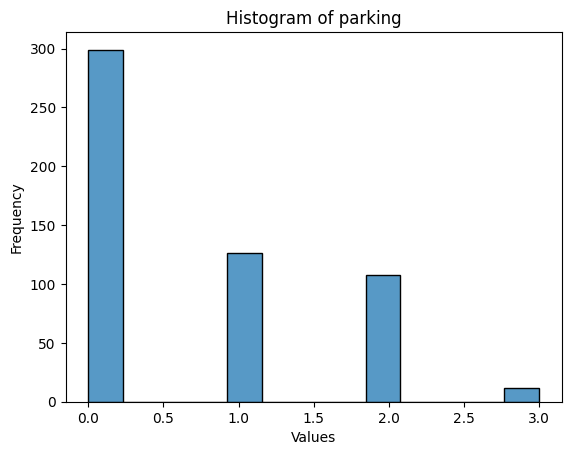

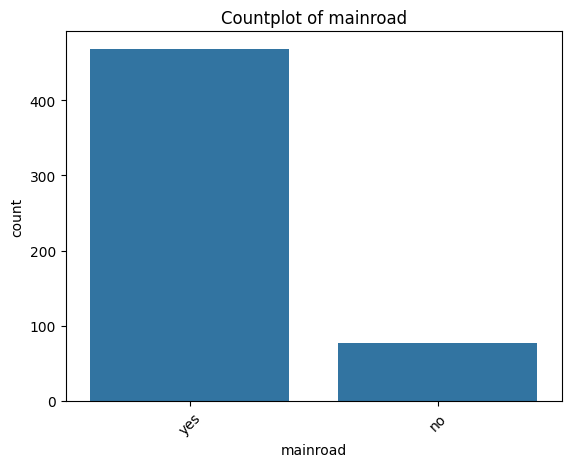

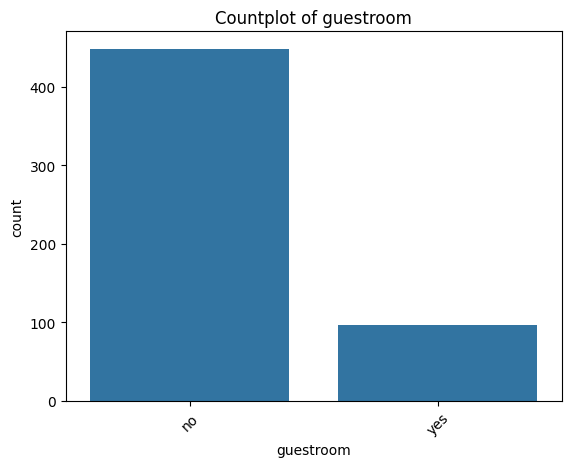

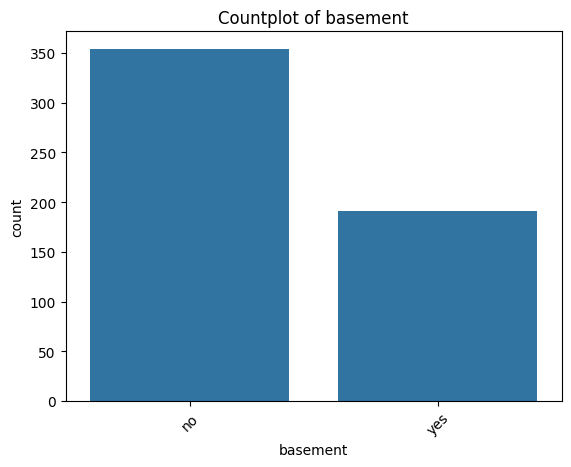

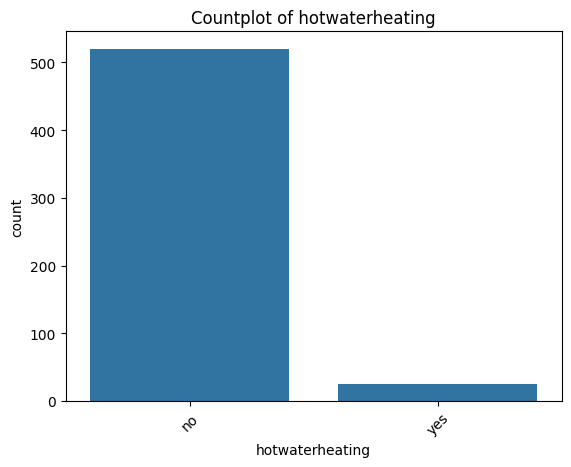

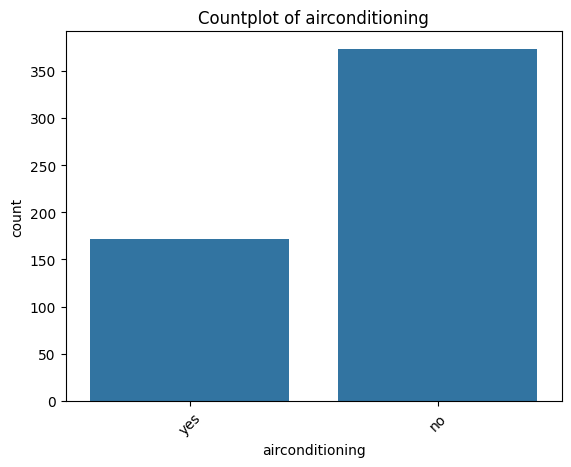

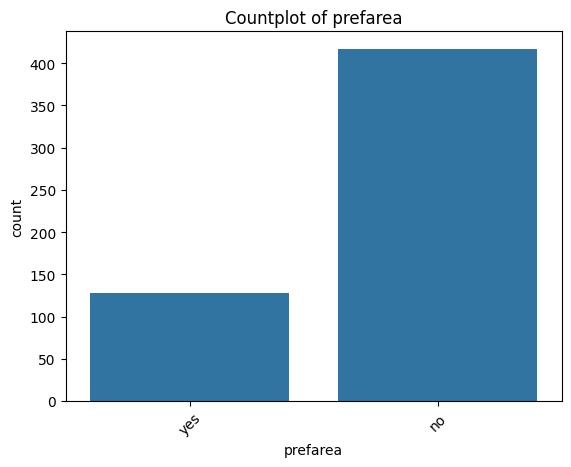

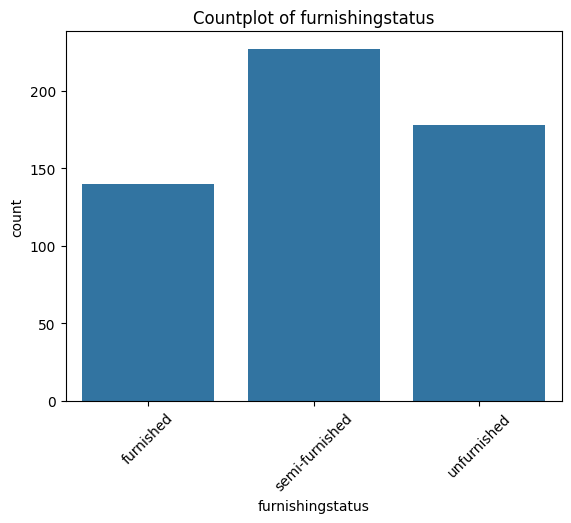

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of numerical columns
numerical_columns = df_main.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure()
    sns.histplot(df_main[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

# Countplot of categorical columns
categorical_columns = df_main.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure()
    sns.countplot(x=col, data=df_main)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-10-623aeacf4b5b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_main.corr()


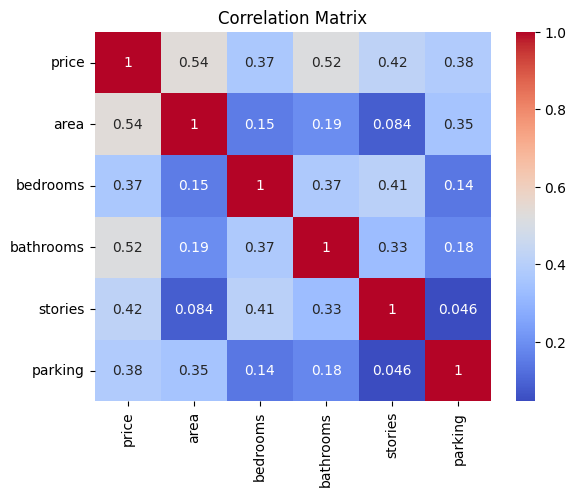

In [ ]:
corr_matrix = df_main.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

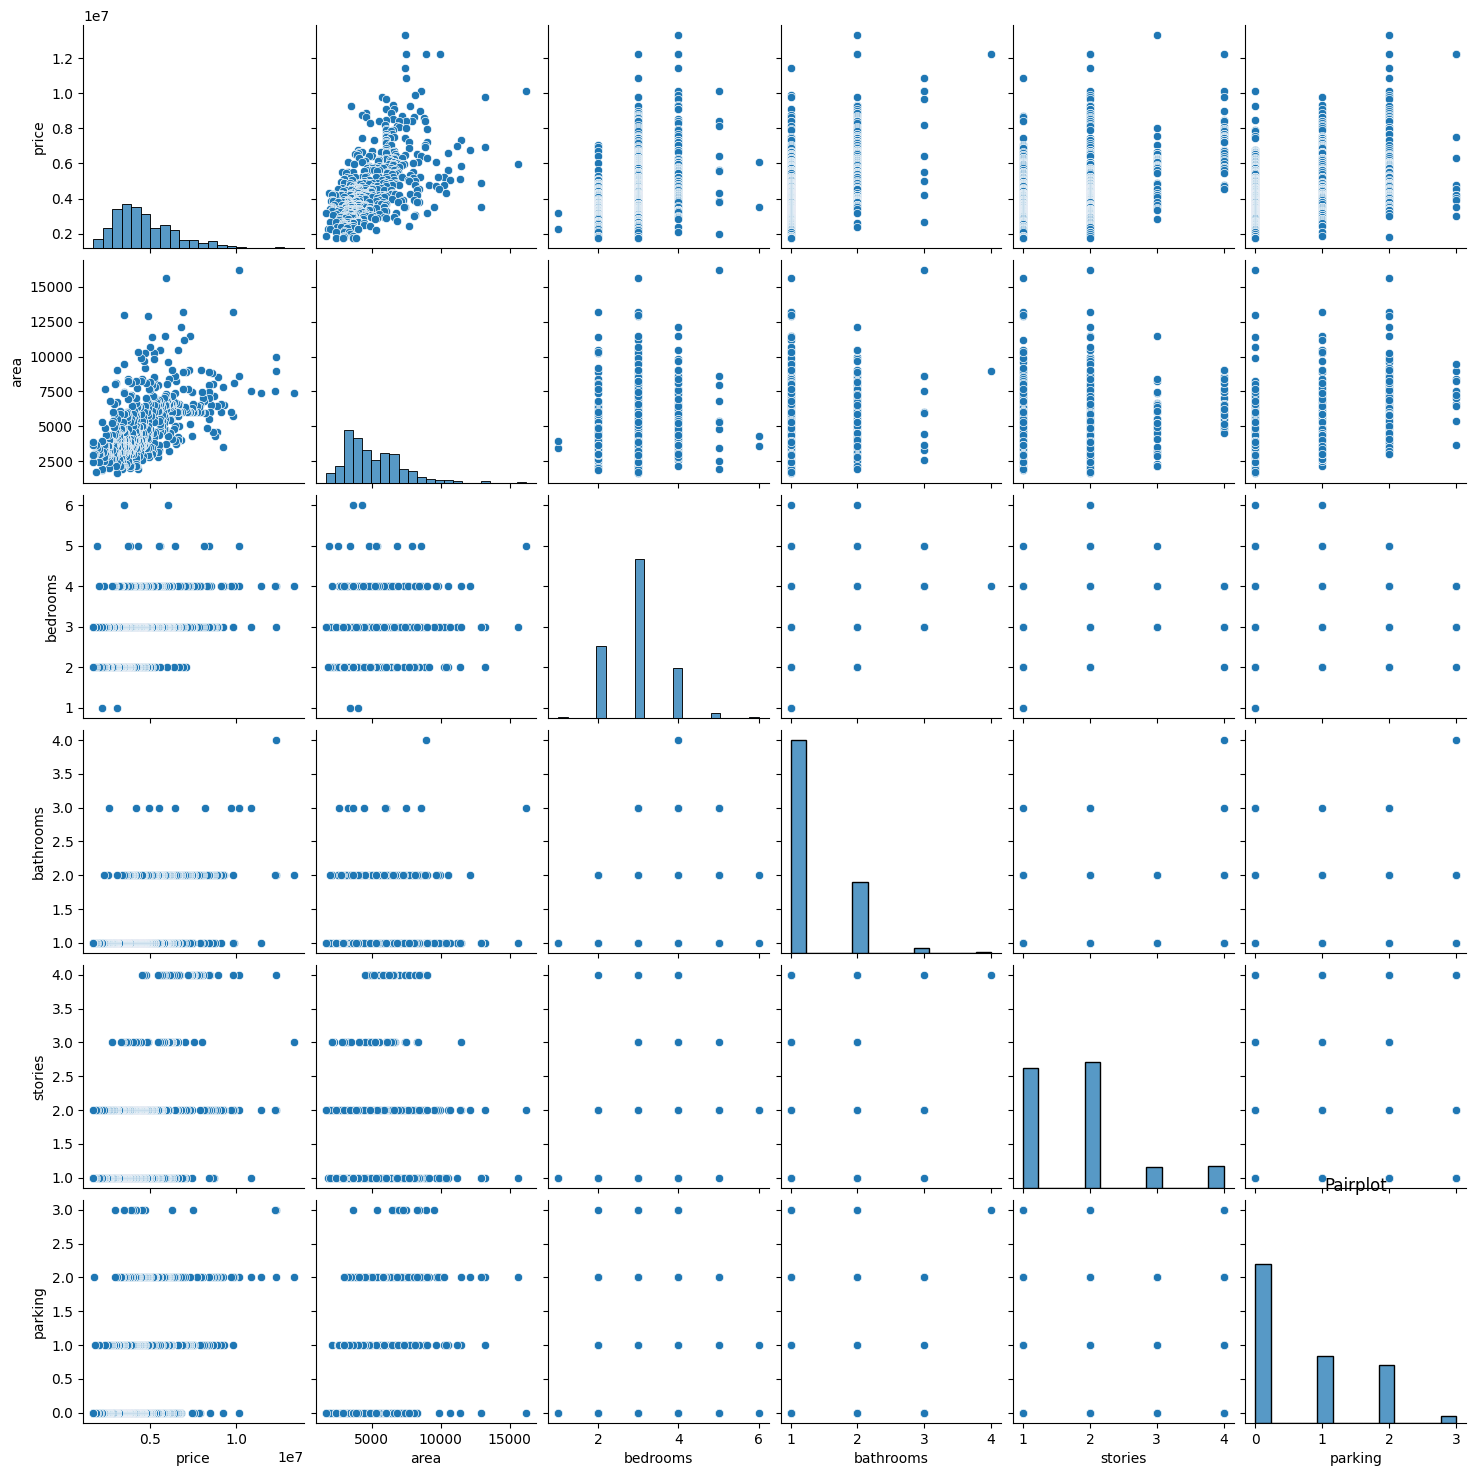

In [ ]:
sns.pairplot(df_main)
plt.title('Pairplot')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file into a DataFrame
df_main = pd.read_csv('Housing.csv')

# Select features (X) and target variable (y)
X = df_main[['area', 'bedrooms', 'stories', 'mainroad', 'guestroom',
             'basement', 'hotwaterheating', 'airconditioning', 'parking',
             'prefarea', 'furnishingstatus']]
y = df_main['price']  # Update the target variable here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (436, 11)
y_train shape: (436,)
X_test shape: (109, 11)
y_test shape: (109,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df_main contains your DataFrame with columns: price, area, bedrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus

# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df_main, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

# Define features (X) and target variable (y)
X = df_encoded[['area', 'bedrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished']]
y = df_encoded['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE) on training and testing sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Print the MSE
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)


Training MSE: 1178261908288.1963
Testing MSE: 1884282111577.485


Train R2-score: 0.62
Test R2-score: 0.63
Train CV scores: [0.59325902 0.59325642 0.54531297 0.60826893 0.5502951 ]
Train CV mean: 0.58


<ipython-input-25-b995c38db8e7>:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_pred_train), hist=False, ax=ax[0])


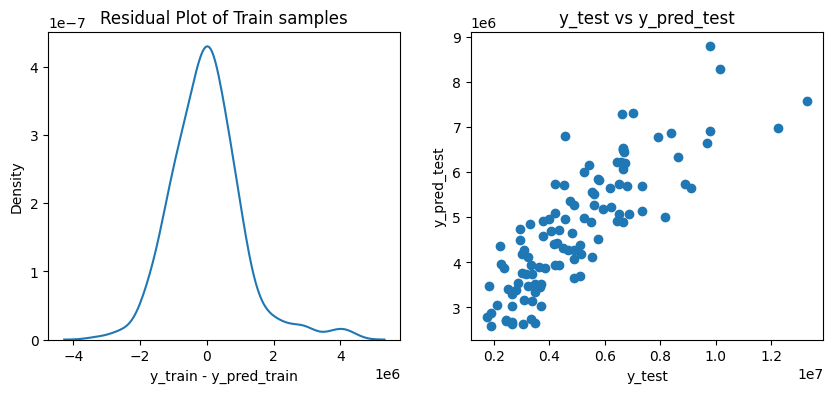

In [ ]:
from sklearn.linear_model import LinearRegression

# Create an instance of Linear Regression model
linear_model = LinearRegression()

# Call the car_pred_model function with the linear regression model
car_pred_model(linear_model, "Linear Regression", X_train, X_test, y_train, y_test)

In [ ]:
# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)


In [ ]:
# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(X_train_encoded, y_train)

# Predictions
y_train_pred = logistic_regression_model.predict(X_train_encoded)
y_test_pred = logistic_regression_model.predict(X_test_encoded)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.08027522935779817
Testing Accuracy: 0.01834862385321101

Classification Report:
              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         1
     1820000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         2
     2100000       0.00      0.00      0.00         1
     2233000       0.00      0.00      0.00         1
     2275000       0.00      0.00      0.00         1
     2380000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         2
     2520000       0.00      0.00      0.00         1
     2660000       0.00      0.00      0.00         4
     2800000       0.00      0.00      0.00         1
     2870000       0.00      0.00      0.00         1
     2940000       0.00      0.00      0.00         2
     3003000       0.00      0.00      0.00         1
     3010000       0.00      0.00      0.00         1
     3045000       0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with n

In [ ]:
# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)


In [ ]:
# Create a Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # Adjust the value of alpha as needed

# Train the model
lasso_model.fit(X_train_encoded, y_train)


Lasso(alpha=0.1)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Assuming df_main contains your DataFrame with the given columns
# Replace 'area', 'bedrooms', ... with actual feature names
X = df_main[['area', 'bedrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df_main['price']  # Assuming 'price' is your target variable

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # Adjust the value of alpha as needed

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print MSE
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)


Training MSE: 1178261908288.8052
Testing MSE: 1884282620523.4578


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming df_main contains your DataFrame with the given columns
# Replace 'area', 'bedrooms', ... with actual feature names
X = df_main[['area', 'bedrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df_main['price']  # Assuming 'price' is your target variable

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print MSE
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)


Training MSE: 200167555320.78082
Testing MSE: 2325795761105.616


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming df_main contains your DataFrame with the given columns
# Replace 'area', 'bedrooms', ... with actual feature names
X = df_main[['area', 'bedrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df_main['price']  # Assuming 'price' is your target variable

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print MSE
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)


Training MSE: 4500863532.110092
Testing MSE: 2274146321409.1743


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming df_main contains your DataFrame with the given columns
# Replace 'area', 'bedrooms', ... with actual feature names
X = df_main[['area', 'bedrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df_main['price']  # Assuming 'price' is your target variable

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Adjust the value of alpha as needed

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print MSE
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)


Training MSE: 1178365673905.893
Testing MSE: 1891094191088.745


In [ ]:
print("Length of R2_train:", len(R2_train))
print("Length of R2_test:", len(R2_test))
print("Length of CV:", len(CV))


Length of R2_train: 2
Length of R2_test: 2
Length of CV: 1
